In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data

Y = iris.target

In [4]:
from sklearn.svm import SVC

In [5]:
model = SVC()

In [6]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [14]:
model.fit(X_train,Y_train)

C:\Users\Hersh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
from sklearn import metrics

In [16]:
predicted = model.predict(X_test)

expected = Y_test

In [17]:
print (metrics.accuracy_score(expected,predicted))

0.9666666666666667


In [18]:
from sklearn import svm

In [19]:
X = iris.data[:,:2]
Y = iris.target

In [20]:
C = 1.0

In [22]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [23]:
rbf = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [24]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

C:\Users\Hersh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\Hersh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
h = 0.02

X_min = X[:,0].min() - 1
X_max = X[:,0].max() + 1

In [28]:
Y_min = X[:,1].min() - 1
Y_max = X[:,1].max() + 1

In [30]:
xx, yy = np.meshgrid(np.arange(X_min,X_max,h),np.arange(Y_min,Y_max,h))

In [31]:
titles = ['SVC with linear kernel',
         'Lienar SVC (lienar kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

ValueError: num must be 1 <= num <= 4, not 5

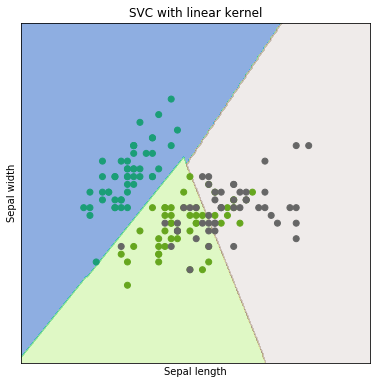

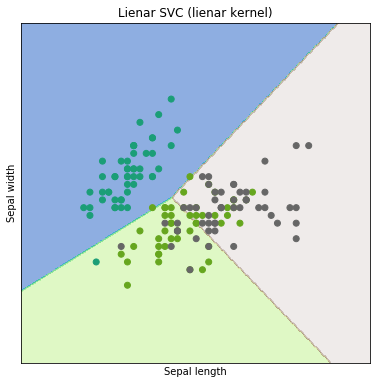

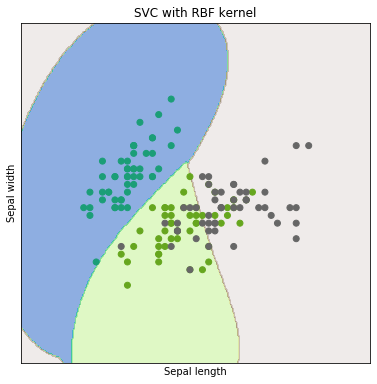

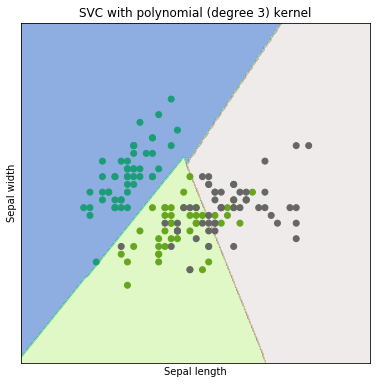

<Figure size 1080x1080 with 0 Axes>

In [35]:
for i,clf in enumerate((svc,lin_svc,rbf,svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])